In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**PREPROCESSING**

In [2]:
df = pd.read_csv("test.csv",index_col=0)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
df.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [4]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(0)

In [5]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [6]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
#id irrelevante
df = df.drop(columns=['id'])

In [8]:
#convertimos datos gender male a 0 y female a 1
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [9]:
#convertimos customer type 0 loyal customer y 1 disloyal customer
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer": 0, "disloyal Customer": 1})

In [10]:
#convertimos type of travel 0 personal travel y 1 business travel
df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel": 0, "Business travel": 1})

In [11]:
#convertimos class 0 business, 1 eco y 2 eco plus
df["Class"] = df["Class"].map({"Business": 0, "Eco": 1,"Eco Plus":2})

In [12]:
#convertimos satisfaction 0 neutral or dissatisfied y 1 satisfied
df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})


In [13]:
#guardamos en un csv
#df.to_csv('clean_data_train.csv',index=False)
#df.to_csv('clean_data_test.csv',index=False)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
#usamos el clean_data_train para separar ya no es necesario usar el train_test_split
df_train = pd.read_csv('clean_data_train.csv')
X_train = df_train.drop('satisfaction', axis=1)
y_train = df_train['satisfaction']

In [46]:
#usamos el clean_data_test para separar ya no es necesario usar el train_test_split
df_test = pd.read_csv('clean_data_test.csv')
X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

In [47]:
feature_names = X_train.columns

**MODEL**

In [48]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Train the model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[14270   303]
 [  659 10744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy Score: 0.9629658145980905


In [51]:
# Make predictions
new_data = X_test  # Replace this with any new data you want to predict
predictions = model.predict(new_data)

In [52]:
#contando cuantos distintos hay en los los predecidos
cont = 0
for i in range(0,len(y_test)):
    if y_test[i]!=predictions[i]:
        cont+=1
print((len(y_test)-cont)/(len(y_test)))

0.9629658145980905


In [53]:
# prediciendo una columna en especifico
data = {
    "Gender": [1],
    "Customer Type": [0],
    "Age": [26],
    "Type of Travel": [1],
    "Class": [0],
    "Flight Distance": [1142],
    "Inflight wifi service": [2],
    "Departure/Arrival time convenient": [2],
    "Ease of Online booking": [2],
    "Gate location": [2],
    "Food and drink": [5],
    "Online boarding": [5],
    "Seat comfort": [5],
    "Inflight entertainment": [5],
    "On-board service": [4],
    "Leg room service": [3],
    "Baggage handling": [4],
    "Checkin service": [4],
    "Inflight service": [4],
    "Cleanliness": [5],
    "Departure Delay in Minutes": [0],
    "Arrival Delay in Minutes": [0],
}

X = pd.DataFrame(data)
X = scaler.fit_transform(X)
new_data = X 
predictions = model.predict(new_data)
predictions


array([0])

**EVALUATION**

## Age by Satisfaction

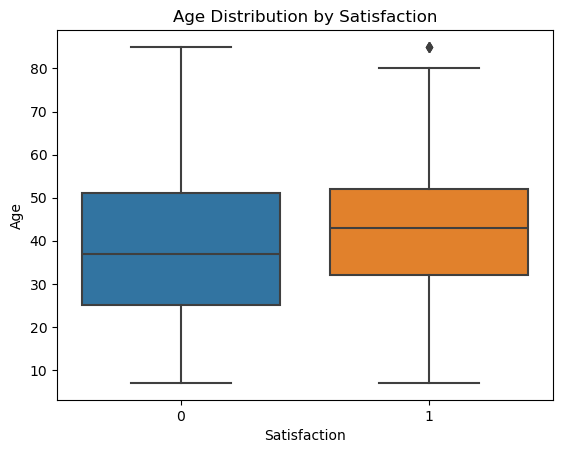

In [54]:
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


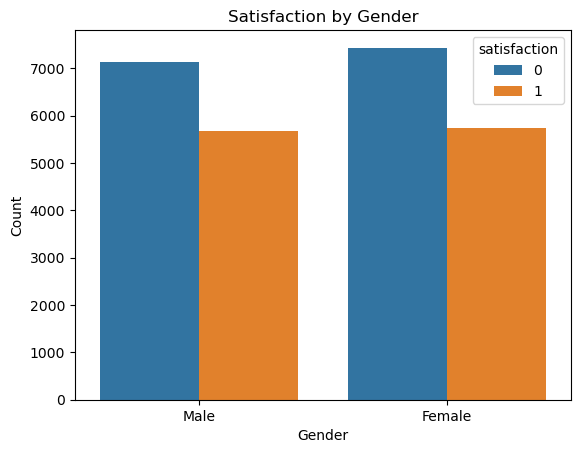

In [55]:
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


## Confusion Matrix

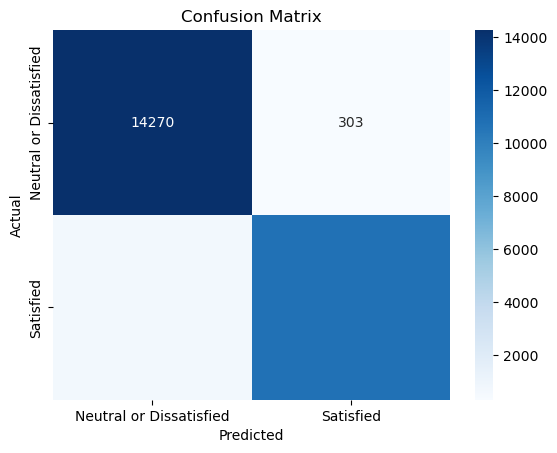

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral or Dissatisfied', 'Satisfied'], yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Correlation HeatMap

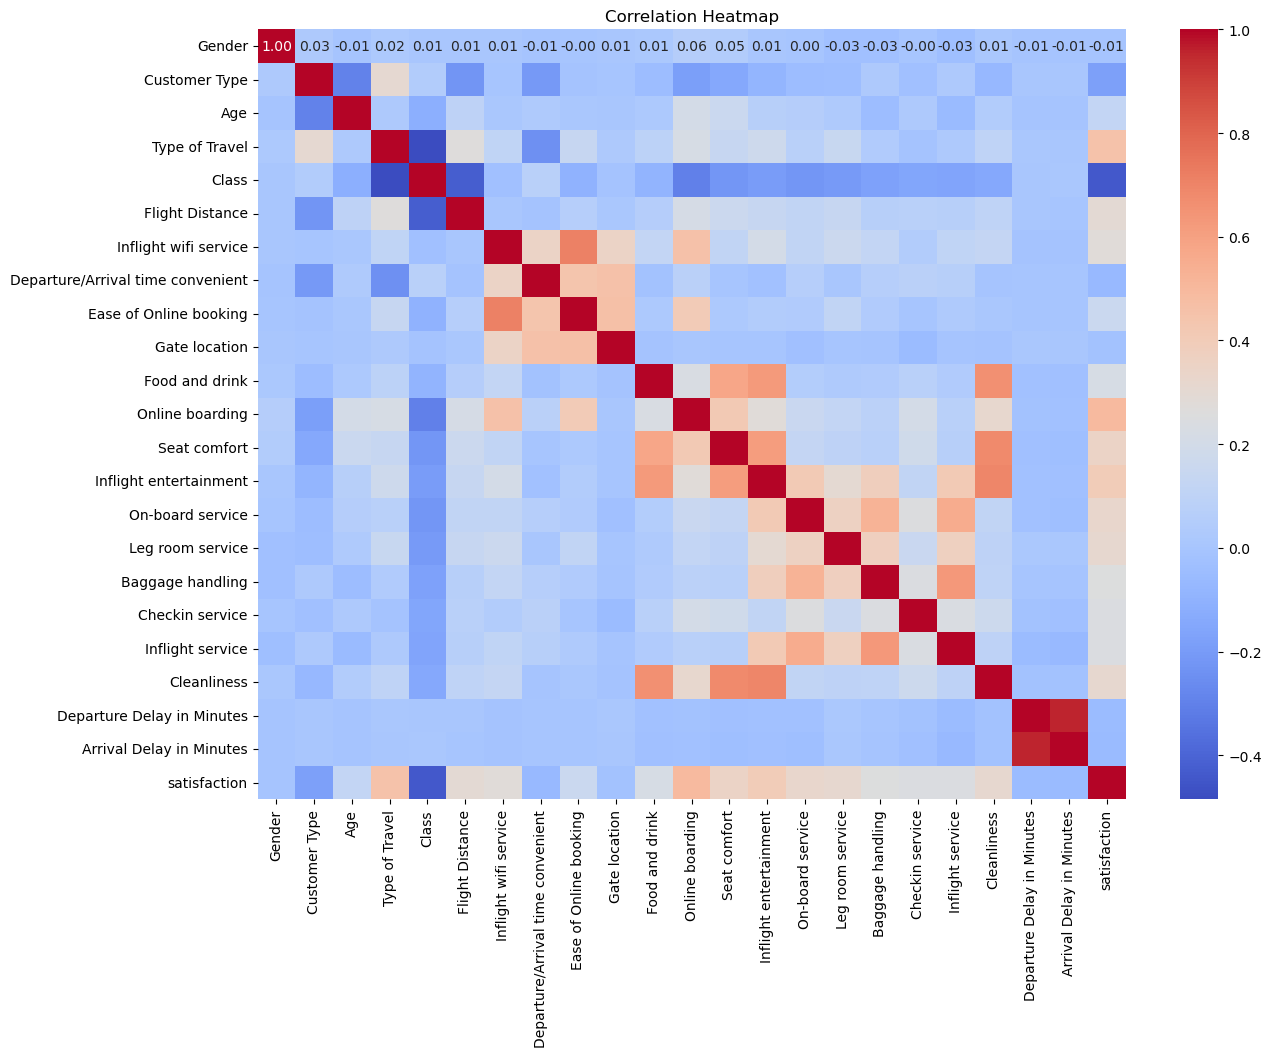

In [39]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Feature Importance

In [41]:
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'